
#   Исследование рынка компьютерных игр  

Интернет-магазин «Стримчик», продаёт компьютерные игры по всему миру. Компании необходимо сделать ставку на потенциально популярный продукт и разработать стратегию рекламных компаний на следующий год.

На основе данных о продажах игр, оценки пользователей и экспертов, жанры и платформы из открытых источников необходимо провести оценку и выявить определяющие успешность игры факторы, популярные рынки сбыта, платформы и возрастную группу игроков.

#  Цель исследования:

Провести анализ данных для определения потенциально популярного продукта и выработки соответствующих рекомендаций по планированию его рекламных компаний.

# Задачи исследования:

- Описать состояния рынка компьютерных игр по регионам

- Определить наиболее популярные платформы и жанры игр в регионах

- Оценить объемы продаж компьютерных игр в зависимости от платформы

- Проанализировать факторы, влияющих на рынок компьютерных игр

- Составить прогноз продаж компьютерных игр на 2017 г.

# Исходные данные:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данное исследование разделим на несколько частей. 

*[Часть 1. Изучение общей информации:](#1)*

*[Часть 2. Подготовка данных:](#2)*

*[Часть 3. Исследовательский анализ данных](#3)*

*[Часть 4. Портрет пользователя каждого региона](#4)*

*[Часть 5. Проверка гипотез](#5)*
* [1. Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. ](#5.1)
* [2. Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные. ](#5.2)

*[Часть 6. Общий вывод](#6)* 

<a id='1'></a>
### Изучение общей информации:

In [2]:
#импортируем библиотеки
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math as mth
import numpy as np
from scipy import stats as st

In [2]:
#откроем файл и посмотрим 10 строк
games = pd.read_csv('/datasets/play.csv')
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5414,Teenage Mutant Ninja Turtles,GC,2003.0,Action,0.26,0.07,0.0,0.01,57.0,8,E
13475,Wayne Gretzky's 3D Hockey '98,PS,1997.0,Sports,0.03,0.02,0.0,0.00,NaN,NaN,NaN
13534,Boktai 2: Solar Boy Django,GBA,2004.0,Role-Playing,0.03,0.01,0.0,0.00,78.0,8.5,T
6313,NHL 07,X360,2006.0,Sports,0.25,0.00,0.0,0.02,79.0,5.3,E10+
291,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.9,0.77,NaN,8.2,E
2318,Harry Potter: Quidditch World Cup,PS2,2003.0,Sports,0.44,0.34,0.0,0.11,68.0,6.6,E
7637,Cabela's North American Adventures,Wii,2010.0,Sports,0.19,0.00,0.0,0.01,NaN,tbd,T
2724,DJ Hero 2,PS3,2010.0,Misc,0.47,0.19,0.0,0.10,86.0,7.8,T
9197,7 Days to Die,PS4,2016.0,Action,0.04,0.08,0.0,0.02,45.0,5.9,M
7037,Carnival Island,PS3,2011.0,Misc,0.13,0.06,0.0,0.04,66.0,5.2,E


In [3]:
#выведем общую информацию
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего у нас 16715 записей. В данных есть пропуски, также видны проблемы с типом данных. Посмотрим дальше как это можно исправить.

<a id='2'></a>
### Подготовка данных: 

Приступим к обработке данных. Для начала приведем в порядок названия столбцов.

In [4]:
#названия столбцов приведем к нижнему регистру
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
#подсчитаем пропуски
games.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

 Пропуски замечены в 6 столбцах из 11. В 2 столбцах всего по 2 пропуска,что совсем незначительно, поэтому их можно просто отбросить. Также в столбце 'year_of_release' 269 пропусков, это 1.6 % от общих записей,это немного и на анализ не повлияет, удалим их. Много пропусков в столбцах 'user_score','rating','critic_score'.Возможно игры просто не были оценены критиками и пользователями, а рейтинг ассоциации ESRB в некоторые года возможно еще не был так распространен и не использовался. Средними и медианой заполнять такие значения неправильно. Не для всех пропусков можно найти логичную замену, поэтому столбцы 'user_score' и 'critic_score' оставим с пропусками. А в столбце 'rating' важная информация, и нужная для дальнейшего анализа, поэтому заменим пропуски на 'Unknown'. 
 

В столбце 'user_score' помимо Nan встречается аббревиатура 'tbd'. Нашла информацию, что TBD - от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Думаю, что tbd можно заменить на Nan в столбце,по смыслу это примерно одно и тоже.

In [6]:
#проверим количество строк и столбцов
games.shape

(16715, 11)

In [7]:
#удалим строки без названия и жанра
games = games.dropna(subset=['name','genre','year_of_release'])
#заменим пропуски в столбце 'user_score' на Nan
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
#заменим пропуски в столбце 'rating' на 'Unknown'
games['rating'] = games['rating'].fillna(value = 'Unknown')

In [8]:
#проверим количество строк и столбцов после удаления
games.shape

(16444, 11)

Далее рассмотрим типы данных в столбцах и если это будет необходимо, изменим их.

In [9]:
#user_score - тип данных object, изменим на  float64
games['user_score']= games['user_score'].astype('float64')

#year_of_release - тип данных float64, изменим на  целочисленный тип
games['year_of_release']= games['year_of_release'].astype('int')

In [10]:
#проверим наличие явных дубликатов
games.duplicated().sum()

0

In [11]:
#найдем неявные дубликаты
games[games.duplicated(subset=['name','platform'], keep=False)].sort_values(['name','platform'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [12]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [13]:
#отобразим конечный результат предообработки
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Вывод: мы заменили названия столбцов, заполнили пропуски,где это было возможно, а также исправили типы данных, теперь можно приступать к анализу данных.

<a id='3'></a>
### Исследовательский анализ данных 

Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды?

В начале,чтобы получить истинное количество «игр по годам» нам следует поискать дубликаты (используя subset по (Годам - Названиям игр) и затем исключить из полного датафрейма все дубли за исключением одной, «первой», строки.

In [14]:
# проверим дубликаты 
games.duplicated(subset=['name','year_of_release']).sum()

4249

In [15]:
games.shape

(16444, 12)

In [16]:
# удалим дубликаты
game_annual =  games.drop_duplicates(subset = ['name','year_of_release'],keep = 'first')

In [17]:
game_annual.shape

(12195, 12)

In [18]:
# создадим сводную таблицу
games_per_year =game_annual.pivot_table(index='year_of_release',values='name',aggfunc='count')

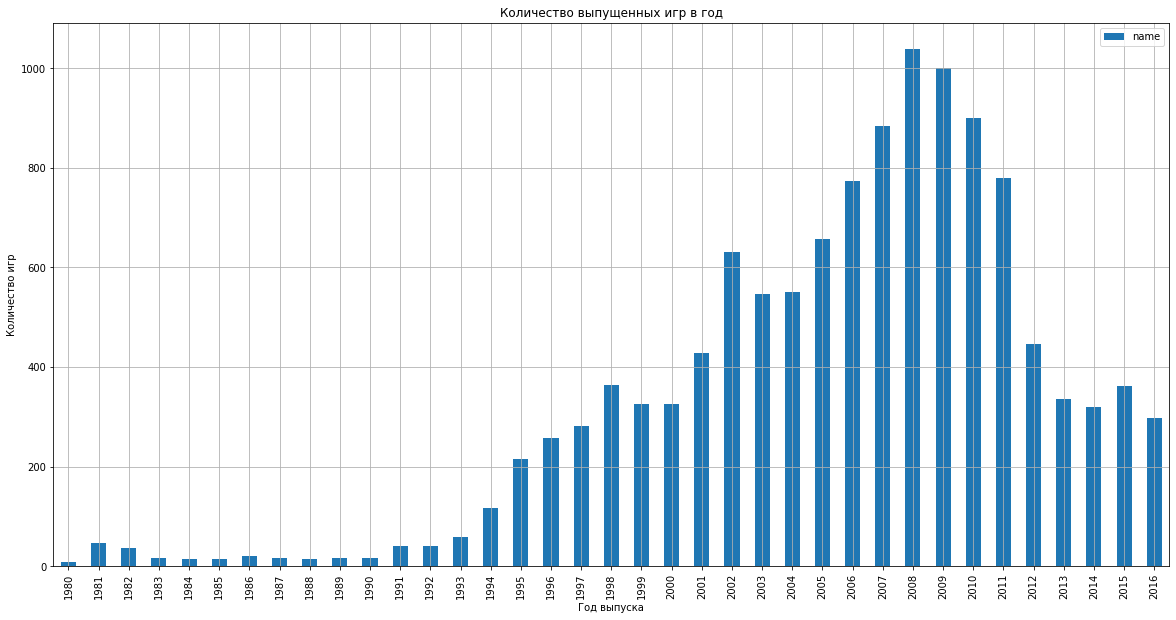

In [19]:
#построим график
games_per_year.plot(kind='bar',grid=True,style='o-',figsize=[20, 10]);
plt.title('Количество выпущенных игр в год');
plt.xlabel('Год выпуска');
plt.ylabel('Количество игр');

Из графика видно, что до 1994 года игр было совсем мало,данные за этот период рассматривать не стоит.В 2000-х годах рынок компьютерных игр начинает быстро расти вплоть до 2008-2009 г,потом начался спад, связанный с экономическим кризисом. C 2013 по 2016 количество выпускаемых игр меняется незначительно.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [20]:
#сгруппируем платформы по общей сумме продаж и выведем первые 10 по убыванию
highest_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
highest_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

In [40]:
#сделаем срез по платформам с с наибольшими суммарными продажами  и по годам,начиная с 1995
high_platforms = games.query('platform in @highest_platforms.index and year_of_release > 1994')

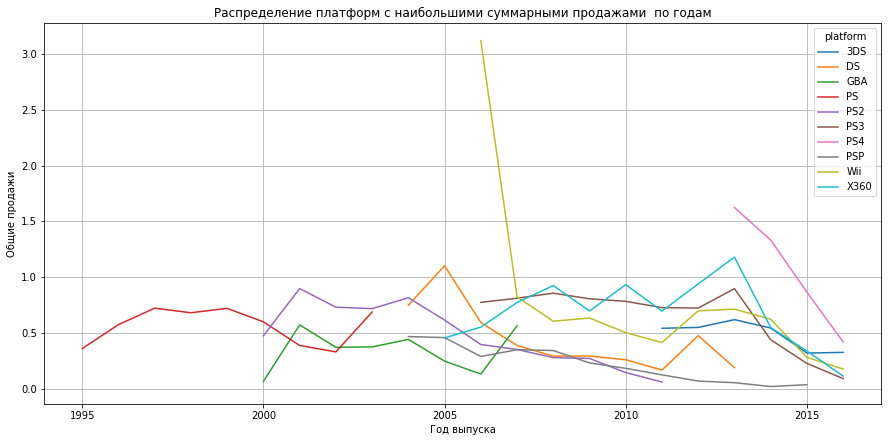

In [42]:
#построим график
high_platforms.pivot_table(index='year_of_release',columns ='platform',values='total_sales')\
                          .plot(grid=True,style='-',figsize=(15,7));
plt.title('Распределение платформ с наибольшими суммарными продажами  по годам');
plt.xlabel('Год выпуска');
plt.ylabel('Общие продажи');

Изучив график, можно сделать следующий вывод, что в среднем платформы существует от 7 до 10 лет. Это связано с тем, что появляются новые  более современные платформы.

Для того чтобы построить прогноз на 2017 год нужно определить соответсвующий актуальный период. Думаю, что нужно взять последние 4 года(2013-2016),в это время как раз появились новые популярные платформы. Учитывать в работе данные за предыдущие годы не будем.


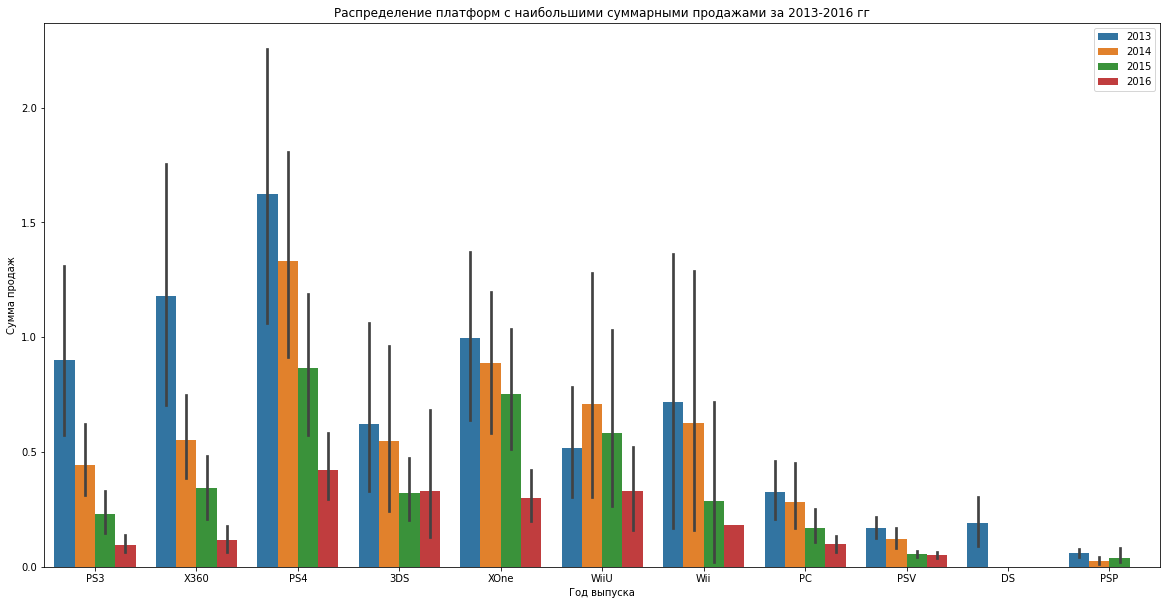

<Figure size 1080x576 with 0 Axes>

In [46]:
# сделаем срез по актуальному периоду
games_updated = games.query('year_of_release >= 2013')

#построим график
hp = sns.barplot(x='platform',
            y='total_sales',
            hue='year_of_release',    
            data=games_updated)
hp.set_title('Распределение платформ с наибольшими суммарными продажами за 2013-2016 гг')
hp.set(xlabel='Год выпуска', ylabel='Сумма продаж');
plt.legend(loc='upper right');
plt.figure(figsize = (15,8));

 Продажи по всем платформам снижаются,в 2016 году самые низкие показатели, связано это с тем, что данные за этот год неполные. 

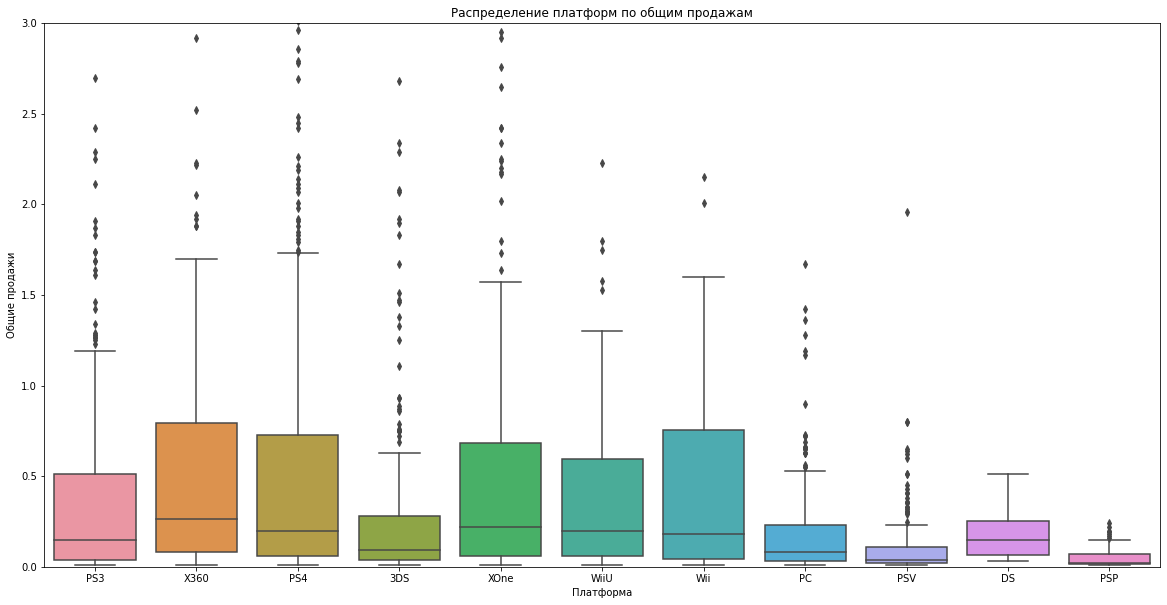

<Figure size 1080x576 with 0 Axes>

In [47]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
sns.boxplot(data=games_updated , x='platform', y='total_sales').set (title='Распределение платформ по общим продажам');
plt.ylim(0,3);
plt.xlabel('Платформа');
plt.ylabel('Общие продажи');
plt.figure(figsize = (15,8));

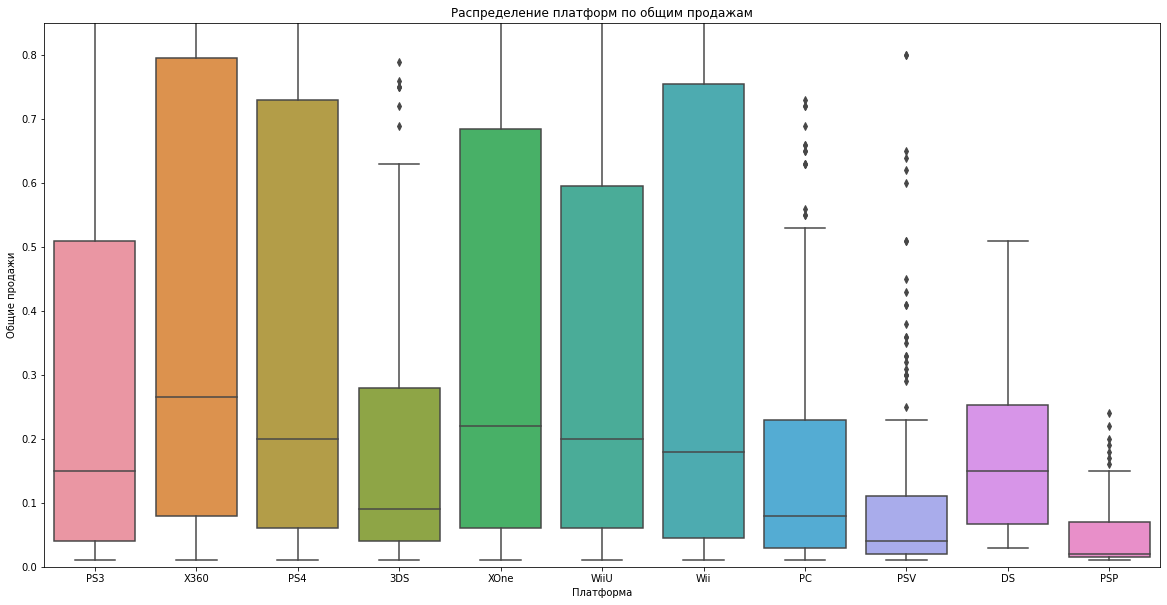

<Figure size 1080x576 with 0 Axes>

In [48]:
#рассмотрим график ближе
sns.boxplot(data=games_updated , x='platform', y='total_sales').set(title='Распределение платформ по общим продажам');
plt.ylim(0,0.85);
plt.xlabel('Платформа');
plt.ylabel('Общие продажи');
plt.figure(figsize = (15,8));

In [49]:
#выведем список статистических значений
games_updated.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Вывод: Медиана по топовым платформам находится в пределах от 0,2 до 0,26 млн долларов прибыли за игру,выбросы же показывают, что у многих платформ есть успешные игры с большими продажами.
Больше всего игр для приставки PS4, медианная сумма продаж выше у X360, потом идет XOne и PS4. 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

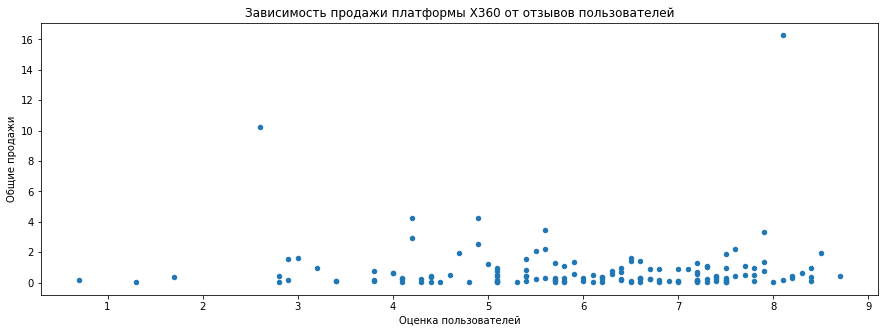

In [26]:
#построим диаграмму рассеивания
games_updated.query("platform == 'X360'").plot(x='user_score',y='total_sales',kind='scatter',figsize=(15,5))
plt.title('Зависимость продажи платформы X360 от отзывов пользователей');
plt.xlabel('Оценка пользователей');
plt.ylabel('Общие продажи');

Из графика видно, что зависимости от оценки пользователей нет.

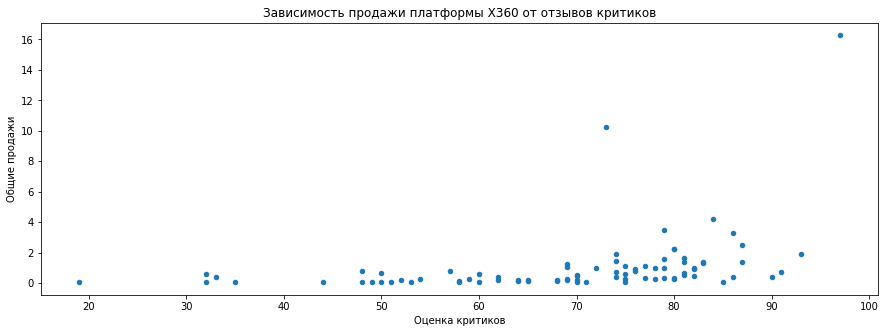

In [27]:
#построим диаграмму рассеивания
games_updated.query("platform == 'X360'").plot(x='critic_score',y='total_sales',kind='scatter',figsize=(15,5))
plt.title('Зависимость продажи платформы X360 от отзывов критиков');
plt.xlabel('Оценка критиков');
plt.ylabel('Общие продажи');

Наблюдается небольшая зависимость от отзывов критиков.

In [28]:
#посчитаем корреляцию между отзывами и продажами
games_updated.query("platform == 'X360'")[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']

critic_score    0.350345
user_score     -0.011742
total_sales     1.000000
Name: total_sales, dtype: float64

По коэффициенту корреляции Пирсона можно сделать вывод, что связи между оценкой пользователя и продажами нет, а между продажами и оценкой критиков небольшая линейная связь. 

Сравним с продажами игр на других платформах в зависимости от оценки пользователя и критиков.

In [53]:
#посчитаем корреляцию для других платформ
games_top = ['PS4','Wii','XOne','PS3']
for i in games_top:
    display('Корреляция между отзывами и продажами на платформе:', i)
    display(games_updated.query("platform in @i")[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])  

'Корреляция между отзывами и продажами на платформе:'

'PS4'

critic_score    0.406568
user_score     -0.031957
total_sales     1.000000
Name: total_sales, dtype: float64

'Корреляция между отзывами и продажами на платформе:'

'Wii'

critic_score         NaN
user_score      0.682942
total_sales     1.000000
Name: total_sales, dtype: float64

'Корреляция между отзывами и продажами на платформе:'

'XOne'

critic_score    0.416998
user_score     -0.068925
total_sales     1.000000
Name: total_sales, dtype: float64

'Корреляция между отзывами и продажами на платформе:'

'PS3'

critic_score    0.334285
user_score      0.002394
total_sales     1.000000
Name: total_sales, dtype: float64

Анализируя полученные коэффициенты корреляции по другим платформам, можно сделать вывод, что картина зависимости в целом схожа с платформой 'X360': оценки критиков имеют слабую корреляцию с продажами,а оценки пользователей корреляции с продажами не имеют.

Далее посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

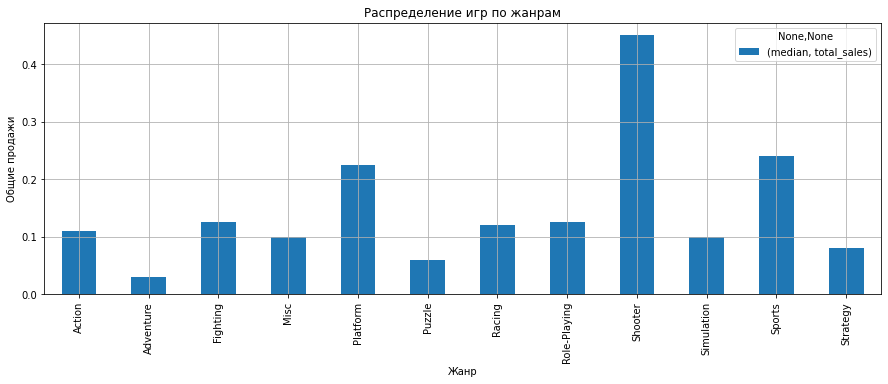

In [54]:
#выведем график общего распределения игр по жанрам
games_updated.pivot_table(index='genre',values='total_sales',\
                          aggfunc=['median']).plot(kind='bar',grid=True,style='o-',figsize=(15,5));
plt.title("Распределение игр по жанрам");
plt.xlabel("Жанр");
plt.ylabel("Общие продажи");

Из графика видно, что по медианным продаж лидерами являются такие жанры как Shooter,Sports, далее идут Platform,Action,Role-Playing. Менее популярные жанры Puzzle,Strategy,Fighting.

<a id='4'></a>
###   Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы(топ-5).

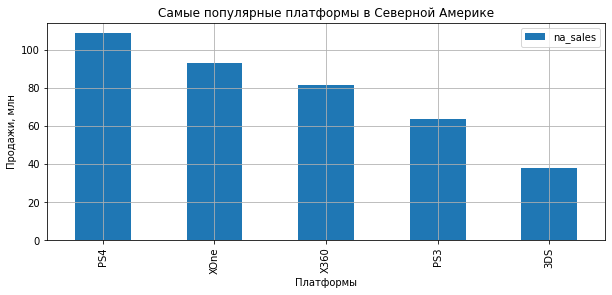

In [64]:
#построим график топ-5 платформ в Северной Америке
na_pivot = games_updated.pivot_table(index='platform', values='na_sales',\
                                     aggfunc='sum').sort_values('na_sales',ascending = False).head(5)
na_pivot.plot(kind='bar',grid=True,style='o-',figsize=(10,4));
plt.title('Cамые популярные платформы в Северной Америке');
plt.xlabel("Платформы");
plt.ylabel("Продажи, млн");

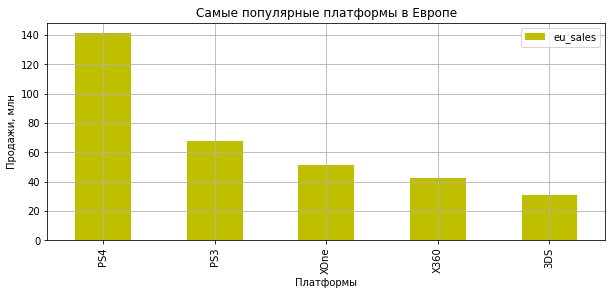

In [65]:
#построим график топ-5 платформ  региона EU 
eu_pivot = games_updated.pivot_table(index='platform',values='eu_sales',
                                     aggfunc='sum').sort_values('eu_sales',ascending = False).head(5)
eu_pivot.plot(kind='bar',grid=True,style='o-',color='y',figsize=(10,4));
plt.title('Cамые популярные платформы в Европе');
plt.xlabel("Платформы");
plt.ylabel("Продажи, млн");

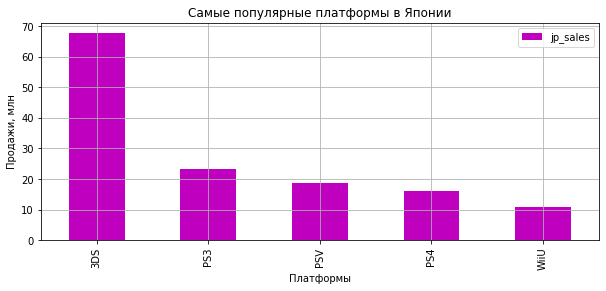

In [66]:
#построим график топ-5 платформ  региона  JP 
jp_pivot = games_updated.pivot_table(index='platform',values='jp_sales',\
                                     aggfunc='sum').sort_values('jp_sales',ascending = False).head(5)
jp_pivot.plot(kind='bar',grid=True,style='o-',color='m',figsize=(10,4));
plt.title('Cамые популярные платформы в Японии');
plt.xlabel("Платформы");
plt.ylabel("Продажи, млн");

Лидером  по популярности платформ,в Америке и в Европе является PS4, и в целом в Северной Америке и Европе список популярных платформ похож. В Японии же лидером является платформа 3DS.

Найдем самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP).

In [34]:
na_top_genre = games_updated.pivot_table(index='genre',values='na_sales',\
                                         aggfunc='sum').sort_values('na_sales',ascending = False).head(5)
na_top_genre

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [35]:
eu_top_genre = games_updated.pivot_table(index='genre',values='eu_sales',aggfunc='sum')\
                                        .sort_values('eu_sales',ascending = False).head(5)
eu_top_genre

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [36]:
jp_top_genre = games_updated.pivot_table(index='genre',values='jp_sales',\
                                         aggfunc='sum').sort_values('jp_sales',ascending = False).head(5)
jp_top_genre

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


Самые популярные жанры игр в Европе и Северной Америке одинаковы,лидерами являются игры жанра Action,Shooter,Sports. В Японии на первом месте Role-Playing, а потом жанры Action,Misc.

Посмотрим  влияет ли рейтинг ESRB на продажи в отдельном регионе?

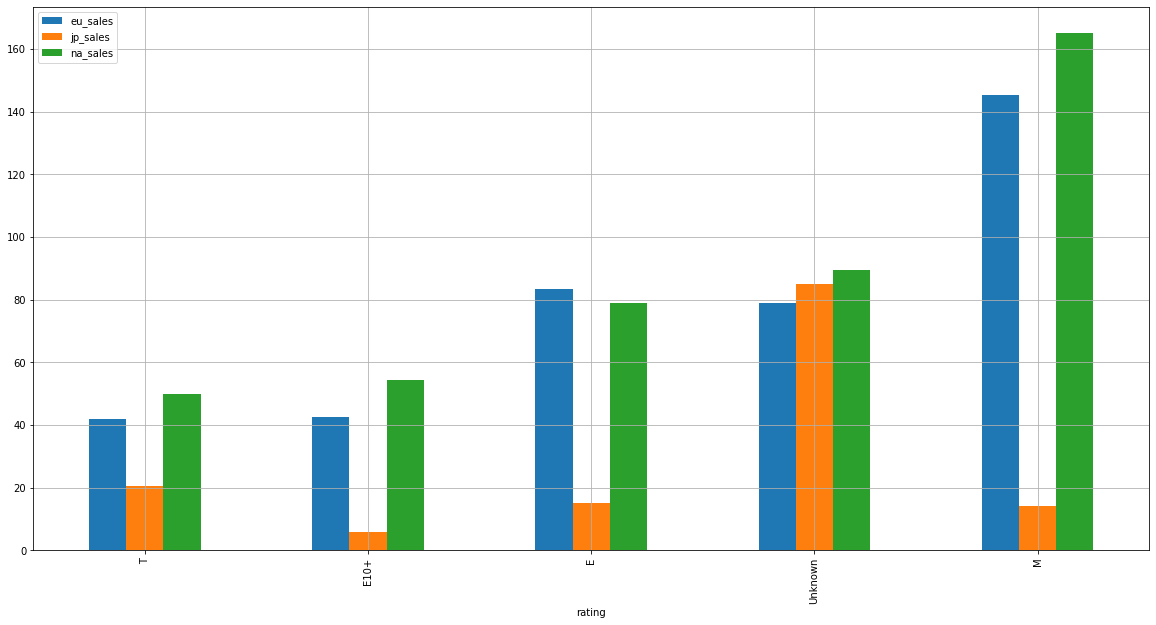

In [37]:
games_updated.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales']\
                          ,aggfunc='sum').sort_values(by='na_sales').plot(kind='bar',grid=True,style='o-');


  Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
- «M» («Mature») — «От 17 лет»: Материалы игры не подходят для подростков младше 17 лет.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. 
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: 
- «E» («Everyone») — «Для всех».
  

Из графика видно, что в Северной Америке и Европе больше продаются игры категории М(от 17 лет), и в целом картина по самым продаваемым играм в зависимости от категории в этих регионах одинакова. В Японии же популярными стали игры без категории, скорее всего это связано с тем, что система  ESRB используется в основном в США, Канаде, Мексике( в Японии же есть CERO (организация компьютерных рейтингов развлечений), которая присваивает играм рейтинги букв).

<a id='5'></a>
### Проверка гипотез

<a id='5.1'></a>
#### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей,взятых по выборке.  
Сформулируем гипотезы так:
- H_0(нулевая гипотеза): рейтинг (rating) платформы "Xbox One" = рейтинг (rating) платформы "PC"`
- H_a(альтернативная гипотеза): рейтинг (rating) платформы "Xbox One" ≠ рейтинг (rating) платформы "PC"`
* Значение уровня статистической значимости определим в 5 %.

Так как в столбце пользовательский рейтинг много пропусков, отфильтруем его, возьмем только значения > 0.

In [38]:
xo = games_updated[(games_updated['platform'] =='XOne') & (games_updated['user_score']>0)]['user_score']
pc = games_updated[(games_updated['platform'] =='PC') & (games_updated['user_score']>0)]['user_score']

results = st.ttest_ind(xo,pc,equal_var=False) # results = вызов метода для проверки гипотезы

alpha = 0.05

print(results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
# условный оператор с выводом строки с ответом

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вывод: у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

<a id='5.2'></a>
#### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные 
Сформулируем гипотезы так:

- H_0: рейтинг (rating) жанра "Action" = рейтинг (rating) жанра "Sports"`
- H_a: рейтинг (rating) жанра "Action" ≠ рейтинг (rating) жанра "Sports"`
* Значение уровня статистической значимости определим в 5 %.

In [39]:
action = games_updated[(games_updated['genre'] =='Action') & (games_updated['user_score']>0)]['user_score']
sports = games_updated[(games_updated['genre'] =='Sports') & (games_updated['user_score']>0)]['user_score']

results = st.ttest_ind(action,sports,equal_var=False) # results = вызов метода для проверки гипотезы

alpha = 0.05

print(results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
# условный оператор с выводом строки с ответом

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Вывод:у нас имеются основания полагать, что средние пользовательские рейтинги жанров Action и Sports различаются.

<a id='6'></a>
### Общий вывод

Мы изучили исторические данные о продажах игр с 1980 г по 2016 год,взяли актуальный период и на его основе  мы выяснили какие игры могут хорошо продаваться в 2017 году и составили портреты пользователей разных регионов.
Если делить по рынкам,при планировании рекламных компаний в 2017 году  в Америке и в Европе следует сделать ставку на игры платформы PS4, а в Японии - на 3DS. Считаем, что наиболее популярными продуктами будут игры в жанре "шутеры" и "спортивные"  в Америке, сюжетно-ролевые в Японии. При анализе данных также составлен портрет пользователей - это люди старше 17 лет, соответственно при планировании рекламных компаний это должно быть учтено. 

